## <font color = red> Ridge and Lasso </font>

#### <font color=green> Import useful tools and data </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn import *
from sklearn.model_selection import *

In [2]:
def datos(modo='entrena'):
    url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data'
    df = pd.read_csv(url, sep='\t')
    tag = 'T' if modo == 'entrena' else 'F'
    df = df[df['train']==tag].drop(columns=['Unnamed: 0', 'train'])
    X_cols = [c for c in df.columns if not c is 'lpsa']
    return df[X_cols], df['lpsa']

#### <font color = green> Create predictors and labels variables </font>

In [3]:
# Create variables from data

X, y = datos(modo='entrena')
predictors = X.drop( 'lpsa',1)
labels = X['lpsa']

X =predictors.to_numpy()
y =labels.to_numpy()

#### <font color = green> Split dataset in train and test set according to 10 Kfold</font> <br>  <font color = green> 

In [4]:
X =predictors.to_numpy()
y =labels.to_numpy()

kf = KFold(n_splits=10, random_state=5)
    
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

#### <font color = green> Define ridge prediction function </font>

In [5]:
def ridge(x, X, y, L):
    
    # yhat = (x * X.T )  * [( X * X.T ) + (alpha * Identity)]^-1 * y
    # mat0 = x * X.T
    # mat1 = X * X.T 
    #lambda_id = i*mat2 for i {1 ... L+1}
    # mat2 = lambda * Identity
    # mat3 = [( X * X.T ) + (lambda * Identity)]^-1

    yhat_pred = []
    
    n, m = X.shape
    I = np.identity(n)
    
    first = np.dot(x,X.T)
    second = (np.dot(np.linalg.inv(np.dot(X, X.T) + L * I),y))
    yhat = np.dot(first, second)
    
    yhat_pred.append(yhat)
    
    return yhat_pred       

#### <font color = green> Loop over lambda in order to get different ridge predictions   </font>

In [6]:
alpha = [0,1,2,3,4,5,6,7,8,9,10]

ypred = []

for i in range(0,11):

    yhatpred = ridge(X_test, X_train, y_train, alpha[i])
    ypred.append(yhatpred)

#### <font color = green> Calculate mean square error for each prediction   </font># 

In [12]:
errors = []

for j in range(0,10):
    
    error = np.mean((ypred[j] - y_test)**2)
    errors.append(error)

In [13]:
print(errors)

[871.4653731999101, 1.0728361077179986, 1.1606562008772154, 1.2370620272946993, 1.305347665889779, 1.3674970644508233, 1.424791992949357, 1.4781096041332262, 1.5280792566698602, 1.5751705672406384]


#### <font color = green> Graph the results  </font>#  

We note that without regularization (lambdas = 0) the mean square error is very important. However, if we accept little more bias (lambda = 1), the variance is much lower. 

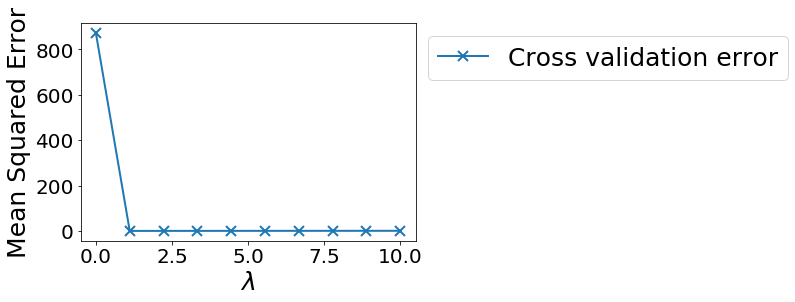

In [15]:
lambdas = np.linspace(0,10, 10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('$\lambda$', fontsize=25)
ax.set_ylabel('Mean Squared Error', fontsize=25)
ax.plot(lambdas, errors, marker='x', markersize=10, lw=2, markeredgewidth='2', label='Cross validation error')
ax.legend(loc='best', fontsize=25, bbox_to_anchor=(1, 1))

In [16]:
ridge(X_test, X_train, y_train, 1)

[array([2.89589013, 3.17781328, 3.61652063, 3.33907407, 4.11680191,
        3.79629916])]

In [17]:
y_test

array([3.993603 , 4.029806 , 4.1295508, 4.3851468, 4.6844434, 5.477509 ])

In [ ]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,p = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(p):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            